In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

### Read in the CSV

In [3]:
import pandas as pd
SOURCE = '../notebooks/kc_house_data.csv'
df = pd.read_csv(SOURCE)

### Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [7]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

### Train/Test Split

In [8]:
from sklearn.model_selection import train_test_split

target ='price'
X = df.drop(columns=target)
y= df[target]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=4300, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=4300, random_state = 42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (13013, 20)
y_train shape (13013,)
X_val shape (4300, 20)
y_val shape (4300,)
X_test shape (4300, 20)
y_test shape (4300,)


### Wrangle the sets

In [9]:
# Wrangle function
def wrangle(X):
    X = X.copy()
    

    X = X.drop(columns =['id','date', 'view', 'lat', 'long', 'yr_renovated', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot','sqft_lot15', 'zipcode'])
    
    return X
X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test = wrangle(X_test)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (13013, 8)
y_train shape (13013,)
X_val shape (4300, 8)
y_val shape (4300,)
X_test shape (4300, 8)
y_test shape (4300,)


In [10]:
# # save the actual results to compare with predicted results later

# result_train = X_train[cols].copy()
# result_val = X_val[cols].copy()
# result_test = X_test[cols].copy()

# result_val.head()

### Train/Val/Test shapes

In [11]:
print('X_train shape', X_train.shape)
print('X_val shape', X_val.shape)
print('X_test shape', X_test.shape)

X_train shape (13013, 8)
X_val shape (4300, 8)
X_test shape (4300, 8)


### Mean Baseline

In [12]:

y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.5460758832470678
Validation R^2, Mean Baseline: -4.6951939390860176e-05


### Log transformation

In [13]:
import numpy as np

# Log transformation of target vector
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

### Visualizations of y_train & y_train_log

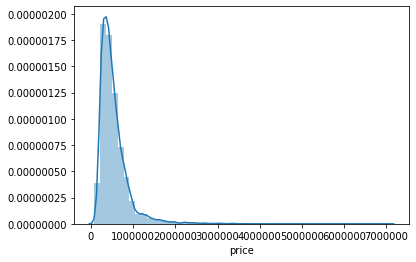

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train)

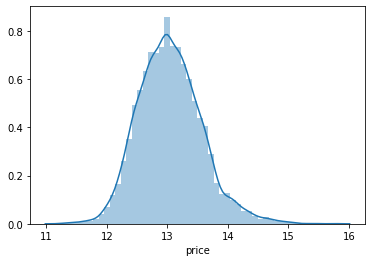

In [15]:
sns.distplot(y_train_log)

### XGBRegressor with early stopping rounds to determine best value for n_estimators

In [16]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [17]:
# XGBRegressor wih early stopping rounds
import warnings
import category_encoders as ce
from xgboost import XGBRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

[18:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.3009	validation_1-rmse:11.3056
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.1725	validation_1-rmse:10.1767
[2]	validation_0-rmse:9.15709	validation_1-rmse:9.16095
[3]	validation_0-rmse:8.24327	validation_1-rmse:8.24697
[4]	validation_0-rmse:7.42093	validation_1-rmse:7.42448
[5]	validation_0-rmse:6.68087	validation_1-rmse:6.68368
[6]	validation_0-rmse:6.01502	validation_1-rmse:6.01764
[7]	validation_0-rmse:5.41589	validation_1-rmse:5.41849
[8]	validation_0-rmse:4.87681	validation_1-rmse:4.87937
[9]	validation_0-rmse:4.39175	validation_1-rmse:4.39398
[10]	validation_0-rmse:3.95543	validation_1-rmse:3.95742
[11]	validation_0-rmse:3.56303	validation_1-rmse:3.56488
[12]	validation_0-rmse:3.21012	validation_1-rmse:3.

[136]	validation_0-rmse:0.292335	validation_1-rmse:0.307732
[137]	validation_0-rmse:0.292288	validation_1-rmse:0.307754
[138]	validation_0-rmse:0.292199	validation_1-rmse:0.307668
[139]	validation_0-rmse:0.292162	validation_1-rmse:0.307656
[140]	validation_0-rmse:0.292135	validation_1-rmse:0.307667
[141]	validation_0-rmse:0.29208	validation_1-rmse:0.307641
[142]	validation_0-rmse:0.292022	validation_1-rmse:0.307643
[143]	validation_0-rmse:0.291995	validation_1-rmse:0.307603
[144]	validation_0-rmse:0.29196	validation_1-rmse:0.30759
[145]	validation_0-rmse:0.291918	validation_1-rmse:0.30757
[146]	validation_0-rmse:0.291858	validation_1-rmse:0.307557
[147]	validation_0-rmse:0.291788	validation_1-rmse:0.307496
[148]	validation_0-rmse:0.291777	validation_1-rmse:0.307465
[149]	validation_0-rmse:0.291754	validation_1-rmse:0.307466
[150]	validation_0-rmse:0.291725	validation_1-rmse:0.307458
[151]	validation_0-rmse:0.291711	validation_1-rmse:0.307456
[152]	validation_0-rmse:0.291657	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

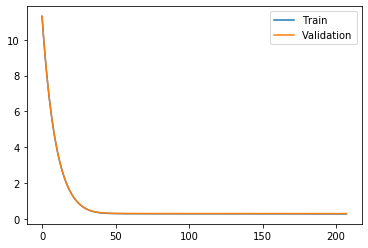

In [18]:
results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
epoch = range(len(train_rmse))
plt.plot(epoch, train_rmse, label='Train')
plt.plot(epoch, val_rmse, label='Validation')
plt.legend();

### Permutation Importance

In [19]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_train_log)
feature_names = X_train_encoded.columns.tolist()
show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1487 ± 0.0022,grade
0.0788 ± 0.0011,sqft_living
0.0694 ± 0.0017,yr_built
0.0073 ± 0.0006,bathrooms
0.0040 ± 0.0001,waterfront
0.0036 ± 0.0000,bedrooms
0.0023 ± 0.0003,condition
0.0013 ± 0.0000,floors


### Plotting feature importances

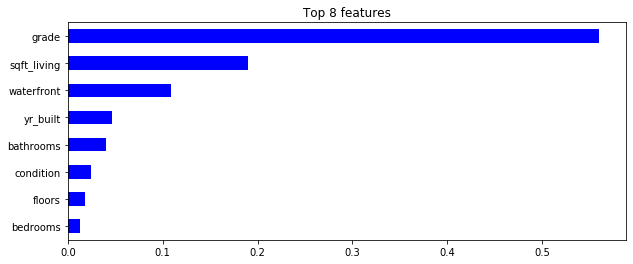

In [20]:
# Get feature importances
importances = pd.Series(model.feature_importances_, X_train_encoded.columns)

# Plot feature importances
n = len(X_train_encoded.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

### Plot y_val_log true/predicted

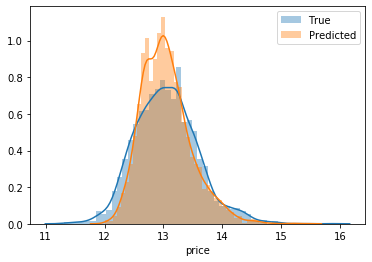

In [21]:
y_pred_log = model.predict(X_val_encoded)
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

### PDP plot 

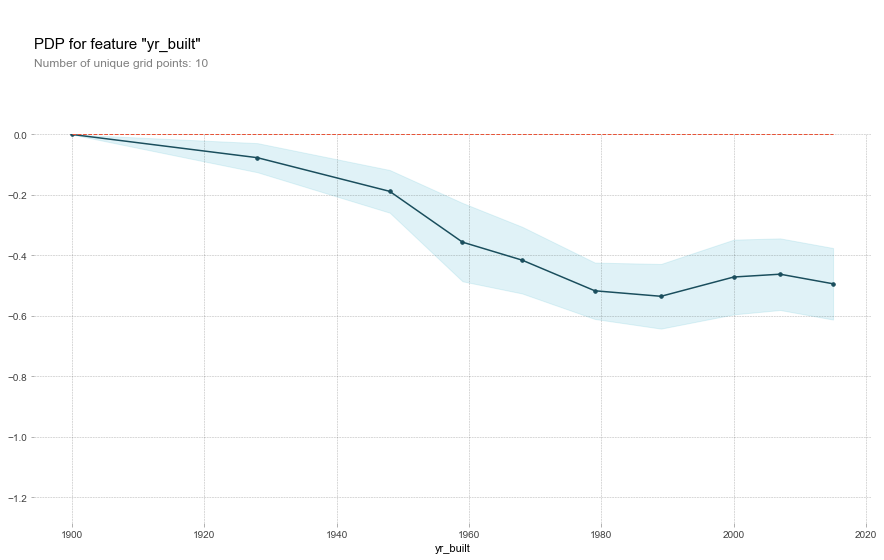

In [22]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'yr_built'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

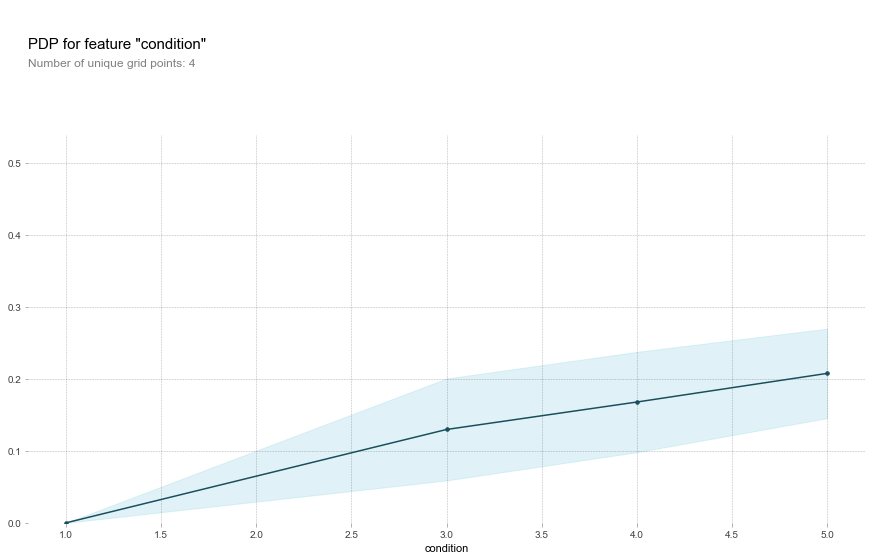

In [23]:
feature = 'condition'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

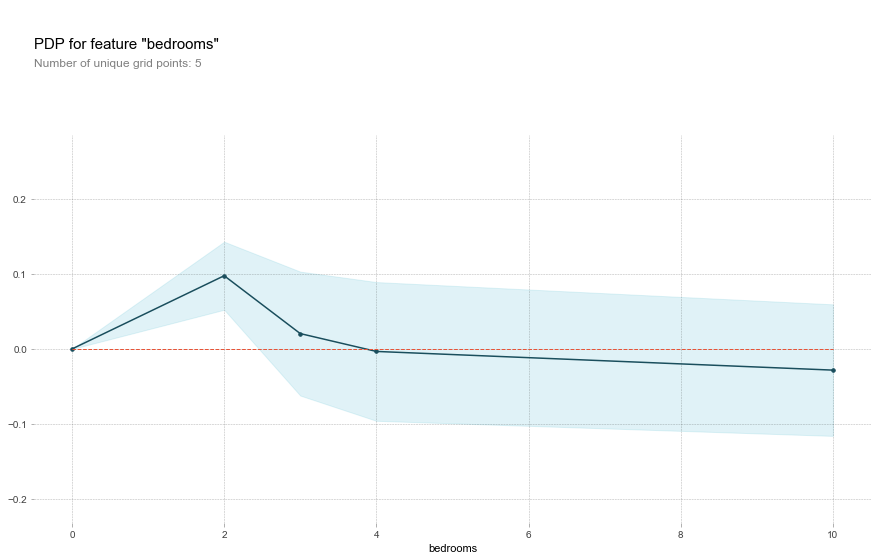

In [24]:
feature = 'bedrooms'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

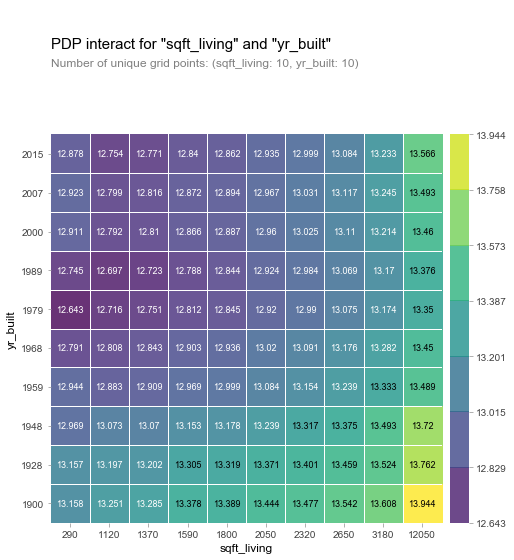

In [25]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['sqft_living', 'yr_built']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [26]:
# Get the test error (one time, at the end)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [27]:
print('RMSLE', rmse(y_test_log, y_pred_log))
print('RMSE:', rmse(y_test, y_pred))

RMSLE 0.3033857751900238
RMSE: 206938.24483054763


In [28]:
from sklearn.metrics import explained_variance_score
print('Var Score:', explained_variance_score(y_pred,y_test))

Var Score: 0.6064442804458653


In [29]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=198, n_jobs=-1, random_state=42,)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
print('y_val RMSLE', rmse(y_val_log, y_pred_log))


[18:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
y_val RMSLE 0.30672989261819333


In [30]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [31]:
def predict(beds,baths,sqft,floor, water, cond, grade, yr):
    df = pd.DataFrame(
        columns=['bedrooms', 'bathrooms','sqft_living','floors', 'waterfront', 'condition', 'grade', 'yr_built'],
        data=[[ beds, baths, sqft, floor, water, cond, grade, yr]]
    )
    y_pred_log=model.predict(df)[0]
    y_pred = np.expm1(y_pred_log)

    return y_pred

predict(3, 3, 1972, 1, 1, 4, 7, 1956)

684080.94

In [32]:
X_test.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
735,4,2.25,2070,2.0,0,4,8,1986
2830,5,3.00,2900,1.0,0,5,8,1977
4106,4,2.50,3770,2.0,0,3,11,1997
16218,3,3.50,4560,2.0,0,3,12,1990
19964,3,2.50,2550,2.0,0,3,9,2004


In [33]:
data_for_prediction = X_test[X_test.index==4106]
data_for_prediction

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
4106,4,2.5,3770,2.0,0,3,11,1997


In [34]:
data_for_prediction_processed = encoder.transform(data_for_prediction)
data_for_prediction_processed = pd.DataFrame(data_for_prediction_processed)
data_for_prediction_processed.columns = data_for_prediction.columns

In [35]:
!pip install category_encoders shap

In [36]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction_processed)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction_processed)

In [37]:
shap.initjs()
data_for_prediction = X_test[X_test.index==19964]
data_for_prediction
data_for_prediction_processed = encoder.transform(data_for_prediction)
data_for_prediction_processed = pd.DataFrame(data_for_prediction_processed)
data_for_prediction_processed.columns = data_for_prediction.columns
shap_values = explainer.shap_values(data_for_prediction_processed)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction_processed)